In [1]:
import sys
sys.path.append('/import/silo2/aloe8475/Documents/edamame')

In [2]:
import numpy as np
from scipy.io import arff
import pandas as pd
import networkx as nx
from edamame import *
from tqdm import tqdm_notebook as tqdm
from scipy.io import loadmat, savemat

In [3]:
data = arff.loadarff('/import/silo2/aloe8475/Documents/CODE/Data/TimeSeries/EEG.arff')
df = pd.DataFrame(data[0])
saveFig='/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'


In [4]:
#remove outliers & replace with mean
for i in list(df.columns[:-1]):
    df.loc[np.abs(df[i]-df[i].mean()) > (3*df[i].std()),i]=df[i].mean()
    df.loc[np.abs(df[i]-df[i].mean()) <= (3*df[i].std()),i]=df[i].mean()

In [5]:
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4301.563366,4009.383653,4264.083553,4122.329567,4341.31475,4620.12919,4072.812136,4615.367661,4201.375197,4231.034,4201.82133,4279.089952,4605.937948,4361.156118,b'0'
1,4301.563366,4009.383653,4264.083553,4122.329567,4341.31475,4620.12919,4072.812136,4615.367661,4201.375197,4231.034,4201.82133,4279.089952,4605.937948,4361.156118,b'0'
2,4301.563366,4009.383653,4264.083553,4122.329567,4341.31475,4620.12919,4072.812136,4615.367661,4201.375197,4231.034,4201.82133,4279.089952,4605.937948,4361.156118,b'0'
3,4301.563366,4009.383653,4264.083553,4122.329567,4341.31475,4620.12919,4072.812136,4615.367661,4201.375197,4231.034,4201.82133,4279.089952,4605.937948,4361.156118,b'0'
4,4301.563366,4009.383653,4264.083553,4122.329567,4341.31475,4620.12919,4072.812136,4615.367661,4201.375197,4231.034,4201.82133,4279.089952,4605.937948,4361.156118,b'0'
5,4301.563366,4009.383653,4264.083553,4122.329567,4341.31475,4620.12919,4072.812136,4615.367661,4201.375197,4231.034,4201.82133,4279.089952,4605.937948,4361.156118,b'0'
6,4301.563366,4009.383653,4264.083553,4122.329567,4341.31475,4620.12919,4072.812136,4615.367661,4201.375197,4231.034,4201.82133,4279.089952,4605.937948,4361.156118,b'0'
7,4301.563366,4009.383653,4264.083553,4122.329567,4341.31475,4620.12919,4072.812136,4615.367661,4201.375197,4231.034,4201.82133,4279.089952,4605.937948,4361.156118,b'0'
8,4301.563366,4009.383653,4264.083553,4122.329567,4341.31475,4620.12919,4072.812136,4615.367661,4201.375197,4231.034,4201.82133,4279.089952,4605.937948,4361.156118,b'0'
9,4301.563366,4009.383653,4264.083553,4122.329567,4341.31475,4620.12919,4072.812136,4615.367661,4201.375197,4231.034,4201.82133,4279.089952,4605.937948,4361.156118,b'0'


In [6]:
# change eyeDetection to 0 or 1
a=df.replace({'eyeDetection':{b'1':1}})
a=df.replace({'eyeDetection':{b'0':0}})
target=a['eyeDetection']

In [7]:
target=np.array(target)

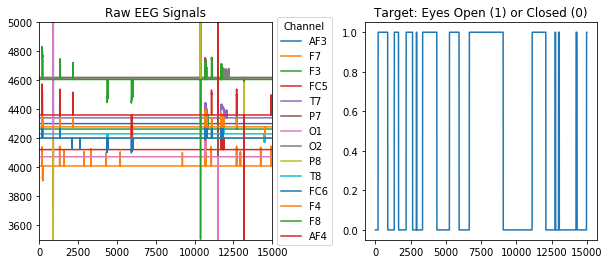

In [8]:
f,axes = plt.subplots(1,2,figsize=(10,4))
f.subplots_adjust(wspace=0.4)
ax=axes[0]
ax.set_title('Raw EEG Signals')
df.plot(ax=ax)
ax.set_ylim([3500,5000])
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title='Channel')
ax=axes[1]
ax.plot(target)
ax.set_title('Target: Eyes Open (1) or Closed (0)')
plt.savefig(saveFig+'EEGSignals+Target.png')

In [10]:
# nw=loadmat('/import/silo2/aloe8475/Documents/edamame/edamame/connectivity_data/500nw_9905junctions.mat')
nw=loadmat('/import/silo2/aloe8475/Documents/edamame/edamame/connectivity_data/200nw_1213junctions.mat')

In [11]:
signal=[]
for column_name, column_series in df.iloc[:, :-1].iteritems():
    signal.append(signal_expand(df[column_name]/3000,1))
dt=100

In [12]:
from multiprocessing import cpu_count

In [13]:
g=nx.from_numpy_array(nw['adj_matrix'])

In [21]:
def runEEG(signal,i):
    sim=runSim(connectivity__(graph=g),T=len(signal[i])*dt,dt=dt,biasType='Custom',customSignal=signal[i],junctionMode = 'tunneling', contactMode='farthest',findFirst=False)
    return sim

In [22]:
sim=[]
for i in tqdm(range(len(signal))):
    sim.append(runEEG(signal,i))


2021-03-29 12:55:24,520:ERROR:Internal Python error in the inspect module.
Below is the traceback from this internal error.

2021-03-29 12:55:24,529:INFO:
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "/suphys/aloe8475/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-26eeb2fb1064>", line 3, in <module>
    sim.append(runEEG(signal,i))
  File "<ipython-input-21-4362c9af6644>", line 2, in runEEG
    sim=runSim(connectivity__(graph=g),T=len(signal[i])*dt,dt=dt,biasType='Custom',customSignal=signal[i],junctionMode = 'tunneling', contactMode='farthest',findFirst=False)
  File "/import/silo2/aloe8475/Documents/edamame/edamame/core/simulate.py", line 190, in runSimulation
    this_realization = simulateNetwork(SimulationOptions, Connectivity, JunctionState, lite_mode, disable_tqdm, save_steps, **kwdict)
  File "/import/silo2/aloe8475/Documents/edamame/edamame/core/simulate.py", line 88, in simulateNetwork
    sol = simCore(connectivity, junctionState, this_stimulus, electrodes, simulationOptions.dt)
  File "/import/silo2/al

KeyboardInterrupt: 

In [23]:
#Actual Parallel
init=[]
for i in tqdm(range(len(signal))):
    init.append(inputPacker(runEEG,signal,i))

In [24]:
sims=para_run(runEEG,init,nCPU=10,start_method='fork')

In [101]:
#Single Linear Regression for each field:
numOutput=len(g)
wireVoltage=[];T=[None]*len(sims);N=[None]*len(sims)
for i in range(len(sims)):
    wireVoltage.append(sims[i].wireVoltage)    
    T[i], N[i] = wireVoltage[i].shape
    
output = dict()
accuracy=np.zeros((len(sims)))
weight = np.zeros((numOutput+1))
result = np.zeros((len(sims),T[0]))

for j in range(len(sims)):
    nodeList = np.random.choice(range(0, N[j]), numOutput, replace = False)
    lhs = np.hstack((np.ones((T[j], 1)), wireVoltage[j][:,nodeList])) # add column of ones corresponding to theta 0
    weight = np.linalg.lstsq(lhs, target, rcond = None)[0]
    result = np.dot(lhs, weight)
    accuracy[j] = 1-getRNMSE(result, np.array(target))

In [113]:
T,N=np.array(signal).T.shape
# lhsOG=(np.hstack((np.ones((T, 1)), np.array(signal).T)))
weight=np.linalg.lstsq(np.array(signal).T, target, rcond = None)[0]
result=np.dot(np.array(signal).T, weight)
accuracy=1-getRNMSE(target,result)


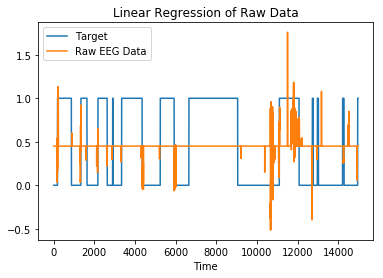

In [120]:
plt.plot(target,label='Target')
plt.plot(result,label='Raw EEG Data')
plt.title('Linear Regression of Raw Data')
plt.xlabel('Time')
plt.legend()
plt.savefig(saveFig+'RawEEGRegression.png')

In [123]:
#Combined Linear Regression 

numOutput=100
import statsmodels.api as sm
from sklearn import linear_model
lhs=[];
for i in tqdm(range(len(sims))):
    wireVoltage=sims[i].wireVoltage
    T, N = wireVoltage.shape
    nodeList = np.random.choice(range(0, N), numOutput, replace = False)
    lhs.append(np.hstack((np.ones((T, 1)), wireVoltage[:,nodeList])))  # add column of ones corresponding to theta 0
weight=np.linalg.lstsq(np.hstack(lhs), target, rcond = None)[0] # perform least squares regression to fit to target
result=np.dot(np.hstack(lhs), weight)
accuracy=1-getRNMSE(target,result)


# lm = linear_model.LinearRegression()
# model = lm.fit(X,Y)
# predictions = lm.predict(X)
# plt.plot(predictions)
# plt.plot(target)

In [124]:
accuracy

0.3939717984829557

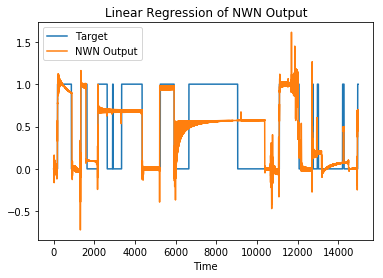

In [127]:
plt.plot(target,label='Target')
plt.plot(result,label='NWN Output')
plt.title('Linear Regression of NWN Output')
plt.xlabel('Time')
plt.legend()
plt.savefig(saveFig+'Results+Accuracy.png')

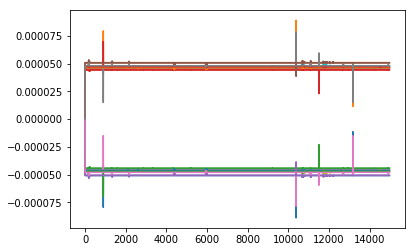

In [31]:
for i in range(len(sims)):
    plt.plot(sims[i].electrodeCurrent)


In [40]:
### Combine all data into one long timeseries:
sim=runSim(connectivity__(adjMat=nw['adj_matrix']),T=len(np.hstack(signal))*dt,dt=dt,biasType='Custom',customSignal=np.hstack(signal),junctionMode = 'tunneling', contactMode='farthest',findFirst=False)

KeyboardInterrupt: 

In [46]:
209720/14

14980.0

In [39]:
numOutput=20
wireVoltage=[];T=[];N=[]
wireVoltage=(sim.wireVoltage)    
T, N = wireVoltage.shape
    
output = dict()
accuracy=[]#np.zeros((len(sim)))
weight = np.zeros(numOutput+1)
result = np.zeros(T)

nodeList = np.random.choice(range(0, N), numOutput, replace = False)
lhs = np.hstack((np.ones((T, 1)), wireVoltage[:,nodeList]))
weight = np.linalg.lstsq(lhs, target, rcond = None)[0]
result = np.dot(lhs, weight)
accuracy = 1-getRNMSE(result, np.array(target))

NameError: name 'sim' is not defined

In [39]:
accuracy

0.25758782685522474

In [ ]:
plt.plot(sim.electrodeCurrent)
